In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1mNAOFj2NW3xd9Em3rLOerFX9RVyR5mCw'})
myfile.GetContentFile('Data file.csv')

In [6]:
df=pd.read_csv('Data file.csv')

In [7]:
df.head()

Unnamed: 0  label       msisdn  ...  payback90  pcircle       pdate
0           1      0  21408I70789  ...  29.000000      UPW  2016-07-20
1           2      1  76462I70374  ...   0.000000      UPW  2016-08-10
2           3      1  17943I70372  ...   0.000000      UPW  2016-08-19
3           4      1  55773I70781  ...   0.000000      UPW  2016-06-06
4           5      1  03813I82730  ...   2.333333      UPW  2016-06-22

[5 rows x 37 columns]

In [8]:
df.shape

(209593, 37)

There are 209593 rows and 37 columns in our dataset

In [9]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

The columns label,pcircle, pdate are of bject type and will need encoding rest all are numerictype.

In [10]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no missing values in our data

In [10]:
pd.set_option('display.max_rows',None)

In [11]:
for col in df:
    print(col,df[col].unique())

Unnamed: 0 [     1      2      3 ... 209591 209592 209593]
label [0 1]
msisdn ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
aon [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
daily_decr30 [ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]
daily_decr90 [ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]
rental30 [ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
rental90 [ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]
last_rech_date_ma [2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]
last_rech_date_da [0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]
last_rech_amt_ma [ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  13

There are many irrelavent data in some columns we need to treat that data. Also, pcircle has only one unique value, so we can drop that column.

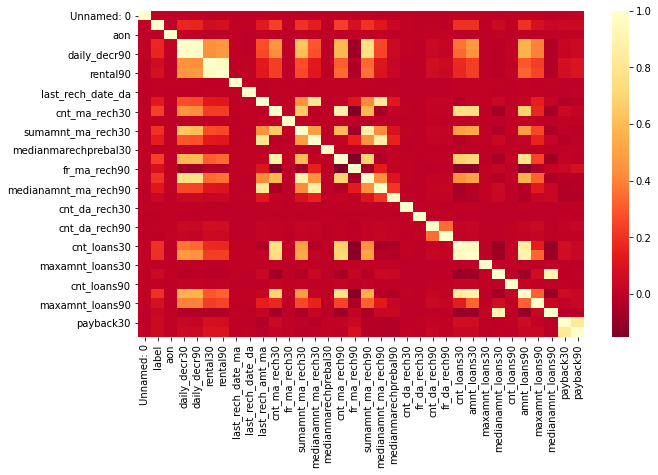

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='YlOrRd_r')
plt.show()

In [61]:
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

We found that Unnamed:0,msisdn,pcircle, pdate have least correlationwith the target data, so we can drop these columns 

In [12]:
df.drop(columns=['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

In [13]:
df.describe()

label            aon  ...      payback30      payback90
count  209593.000000  209593.000000  ...  209593.000000  209593.000000
mean        0.875177    8112.343445  ...       3.398826       4.321485
std         0.330519   75696.082531  ...       8.813729      10.308108
min         0.000000     -48.000000  ...       0.000000       0.000000
25%         1.000000     246.000000  ...       0.000000       0.000000
50%         1.000000     527.000000  ...       0.000000       1.666667
75%         1.000000     982.000000  ...       3.750000       4.500000
max         1.000000  999860.755168  ...     171.500000     171.500000

[8 rows x 33 columns]



1.  Negative values in the columns need to be treated.
2.  huge differnce between 75% and max value shows there are outliers present in the data.
3. Difference between mean and median shows the data is highly skewed.



In [14]:
columns=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

Treating the negative values by first converting them to Nan value and then as our data is skewed, wewill replace it with the median.

In [15]:
df[df[columns] < 0] = np.nan

In [16]:
df.isnull().sum()

label                      0
aon                     1539
daily_decr30            1839
daily_decr90            1839
rental30                5628
rental90                5929
last_rech_date_ma       1315
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64

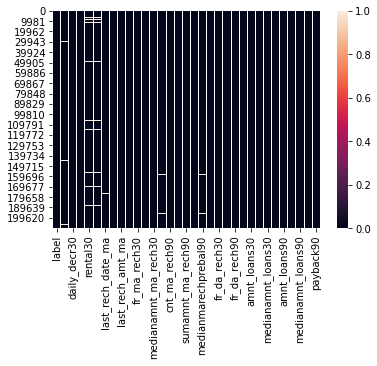

In [17]:
sns.heatmap(df.isnull())

It shows there are null values present in the columns now.

In [17]:
df['aon'].fillna(df['aon'].median(),inplace=True)
df['daily_decr30'].fillna(df['daily_decr30'].median(),inplace=True)
df['daily_decr90'].fillna(df['daily_decr90'].median(),inplace=True)
df['rental30'].fillna(df['rental30'].median(),inplace=True)
df['rental90'].fillna(df['rental90'].median(),inplace=True)
df['last_rech_date_ma'].fillna(df['last_rech_date_ma'].median(),inplace=True)
df['medianmarechprebal30'].fillna(df['medianmarechprebal30'].median(),inplace=True)
df['last_rech_date_da'].fillna(df['last_rech_date_da'].median(),inplace=True)
df['medianmarechprebal90'].fillna(df['medianmarechprebal90'].median(),inplace=True)



In [18]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

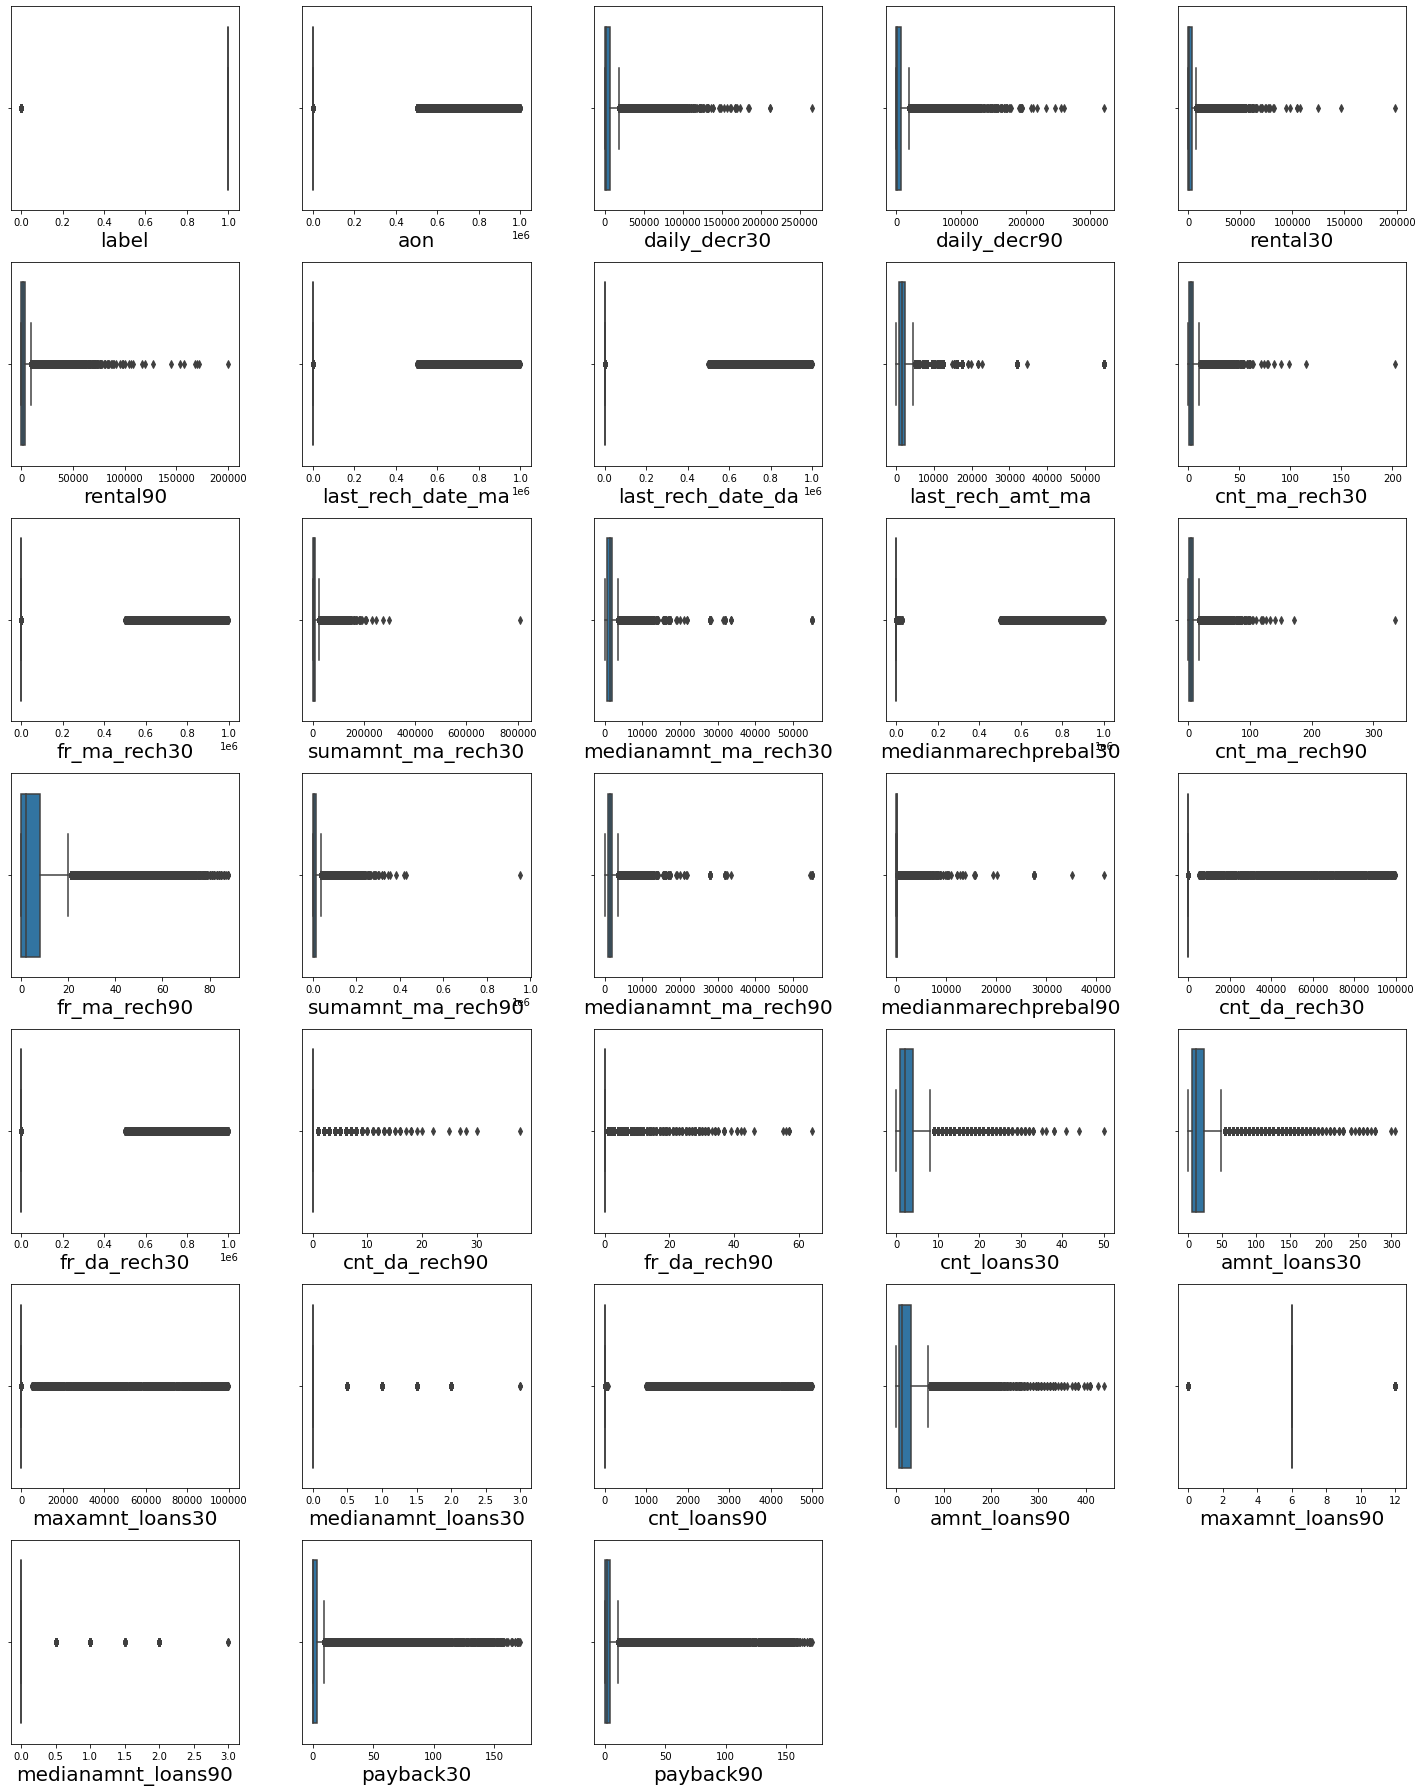

In [71]:
#Univariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()   



The plot shows there are outliers present in every columns of the data.

In [19]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1


Defining the Qaurtile range to remove the outliers

In [20]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.head()

(154588, 33)


label    aon  daily_decr30  ...  medianamnt_loans90  payback30  payback90
1      1  712.0  12122.000000  ...                 0.0   0.000000   0.000000
2      1  535.0   1398.000000  ...                 0.0   0.000000   0.000000
4      1  947.0    150.619333  ...                 0.0   2.333333   2.333333
5      1  568.0   2257.362667  ...                 0.0  11.000000   8.333333
6      1  545.0   2876.641667  ...                 0.0   0.000000   0.000000

[5 rows x 33 columns]

Afetr removing outliers, we have 154588 rows and 33 columns in our data

> Indented block



---



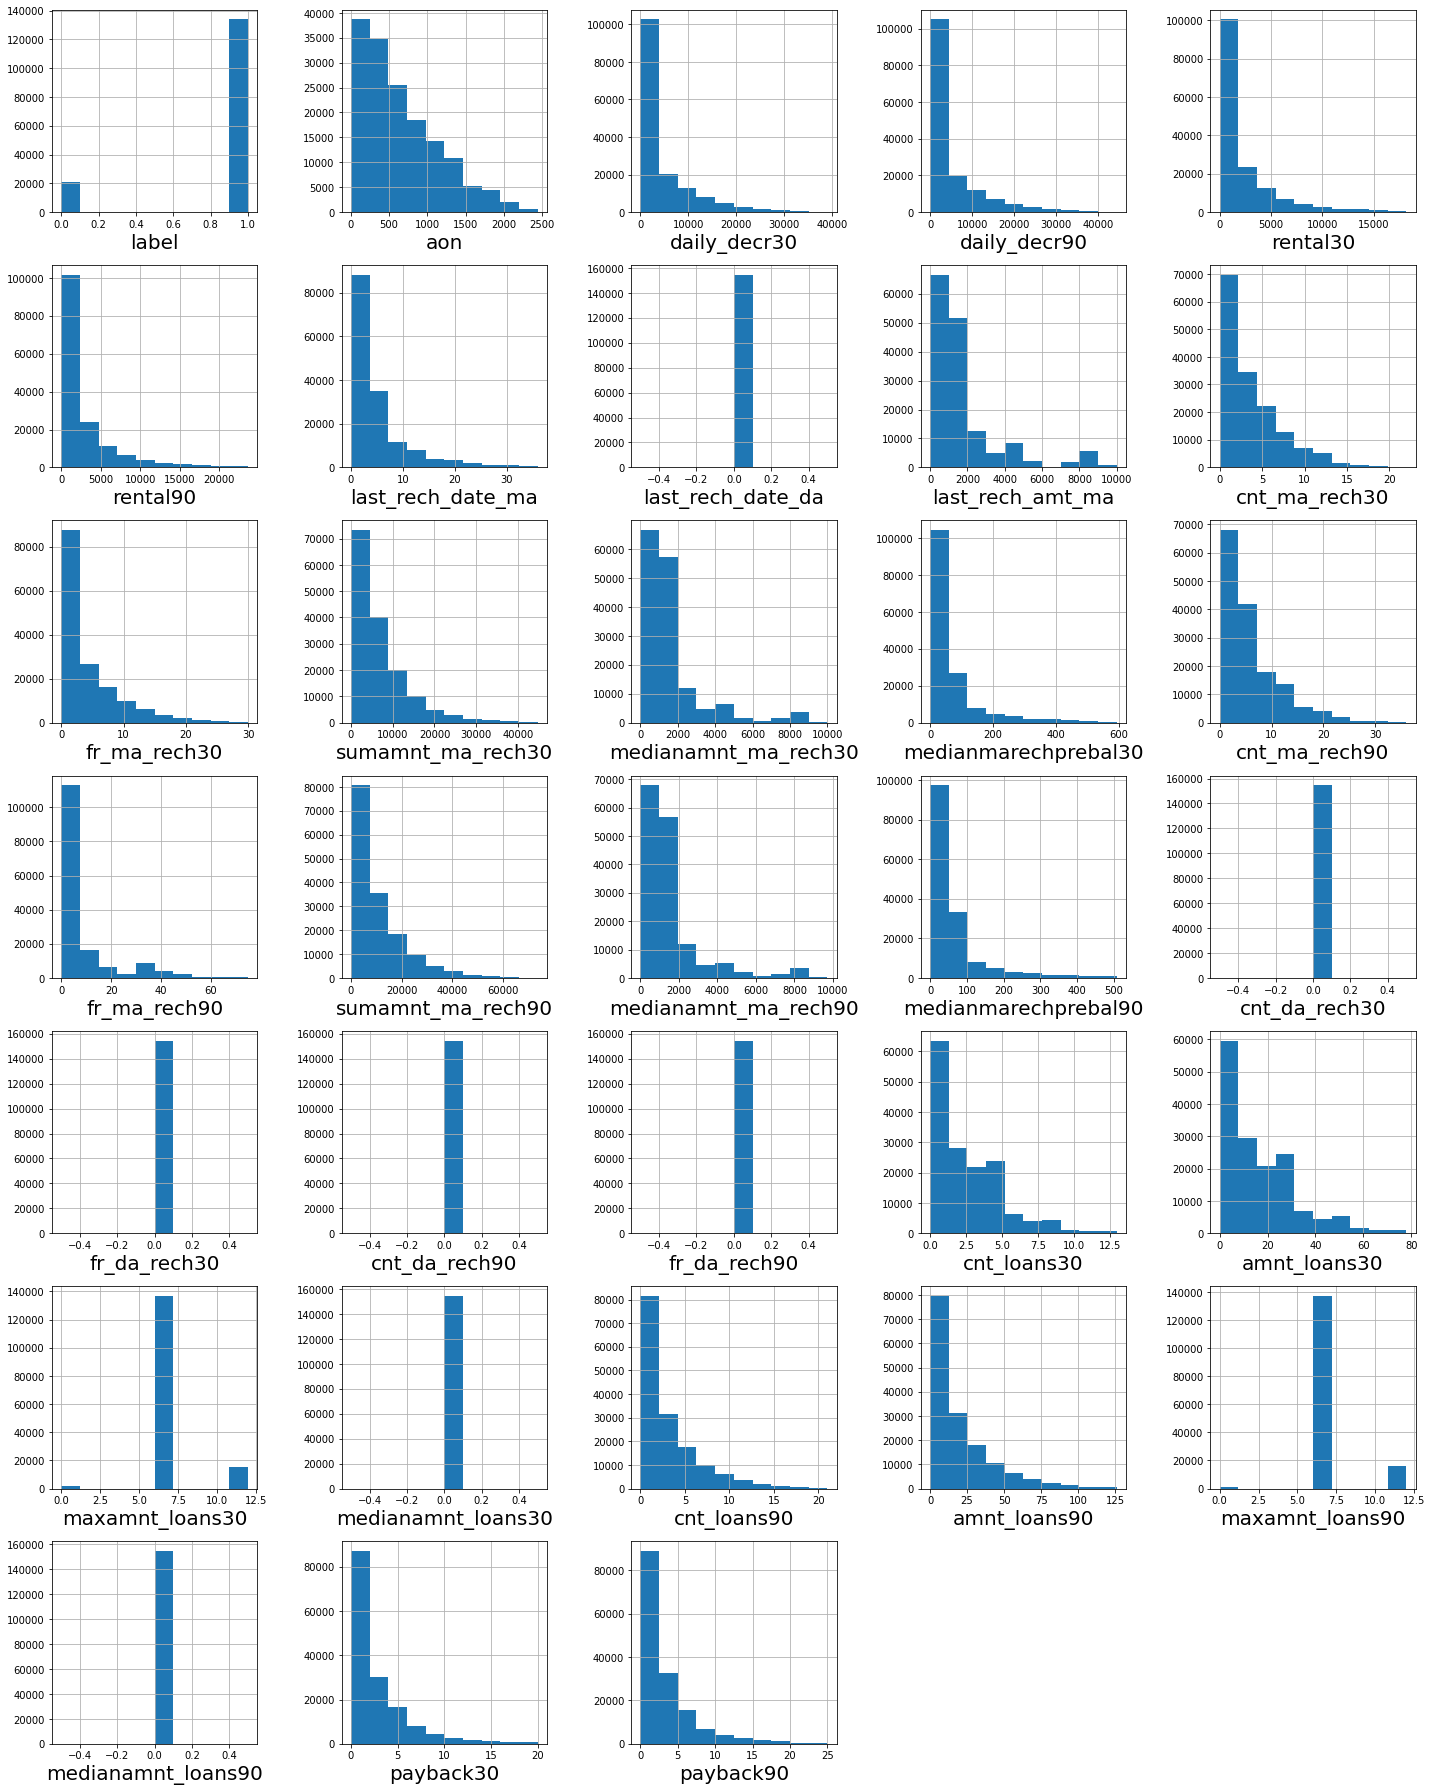

In [23]:
#Bivariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(7,5,plotnumber)
        df[column].hist(bins=10)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

except some columns, most of the data is right skewed.

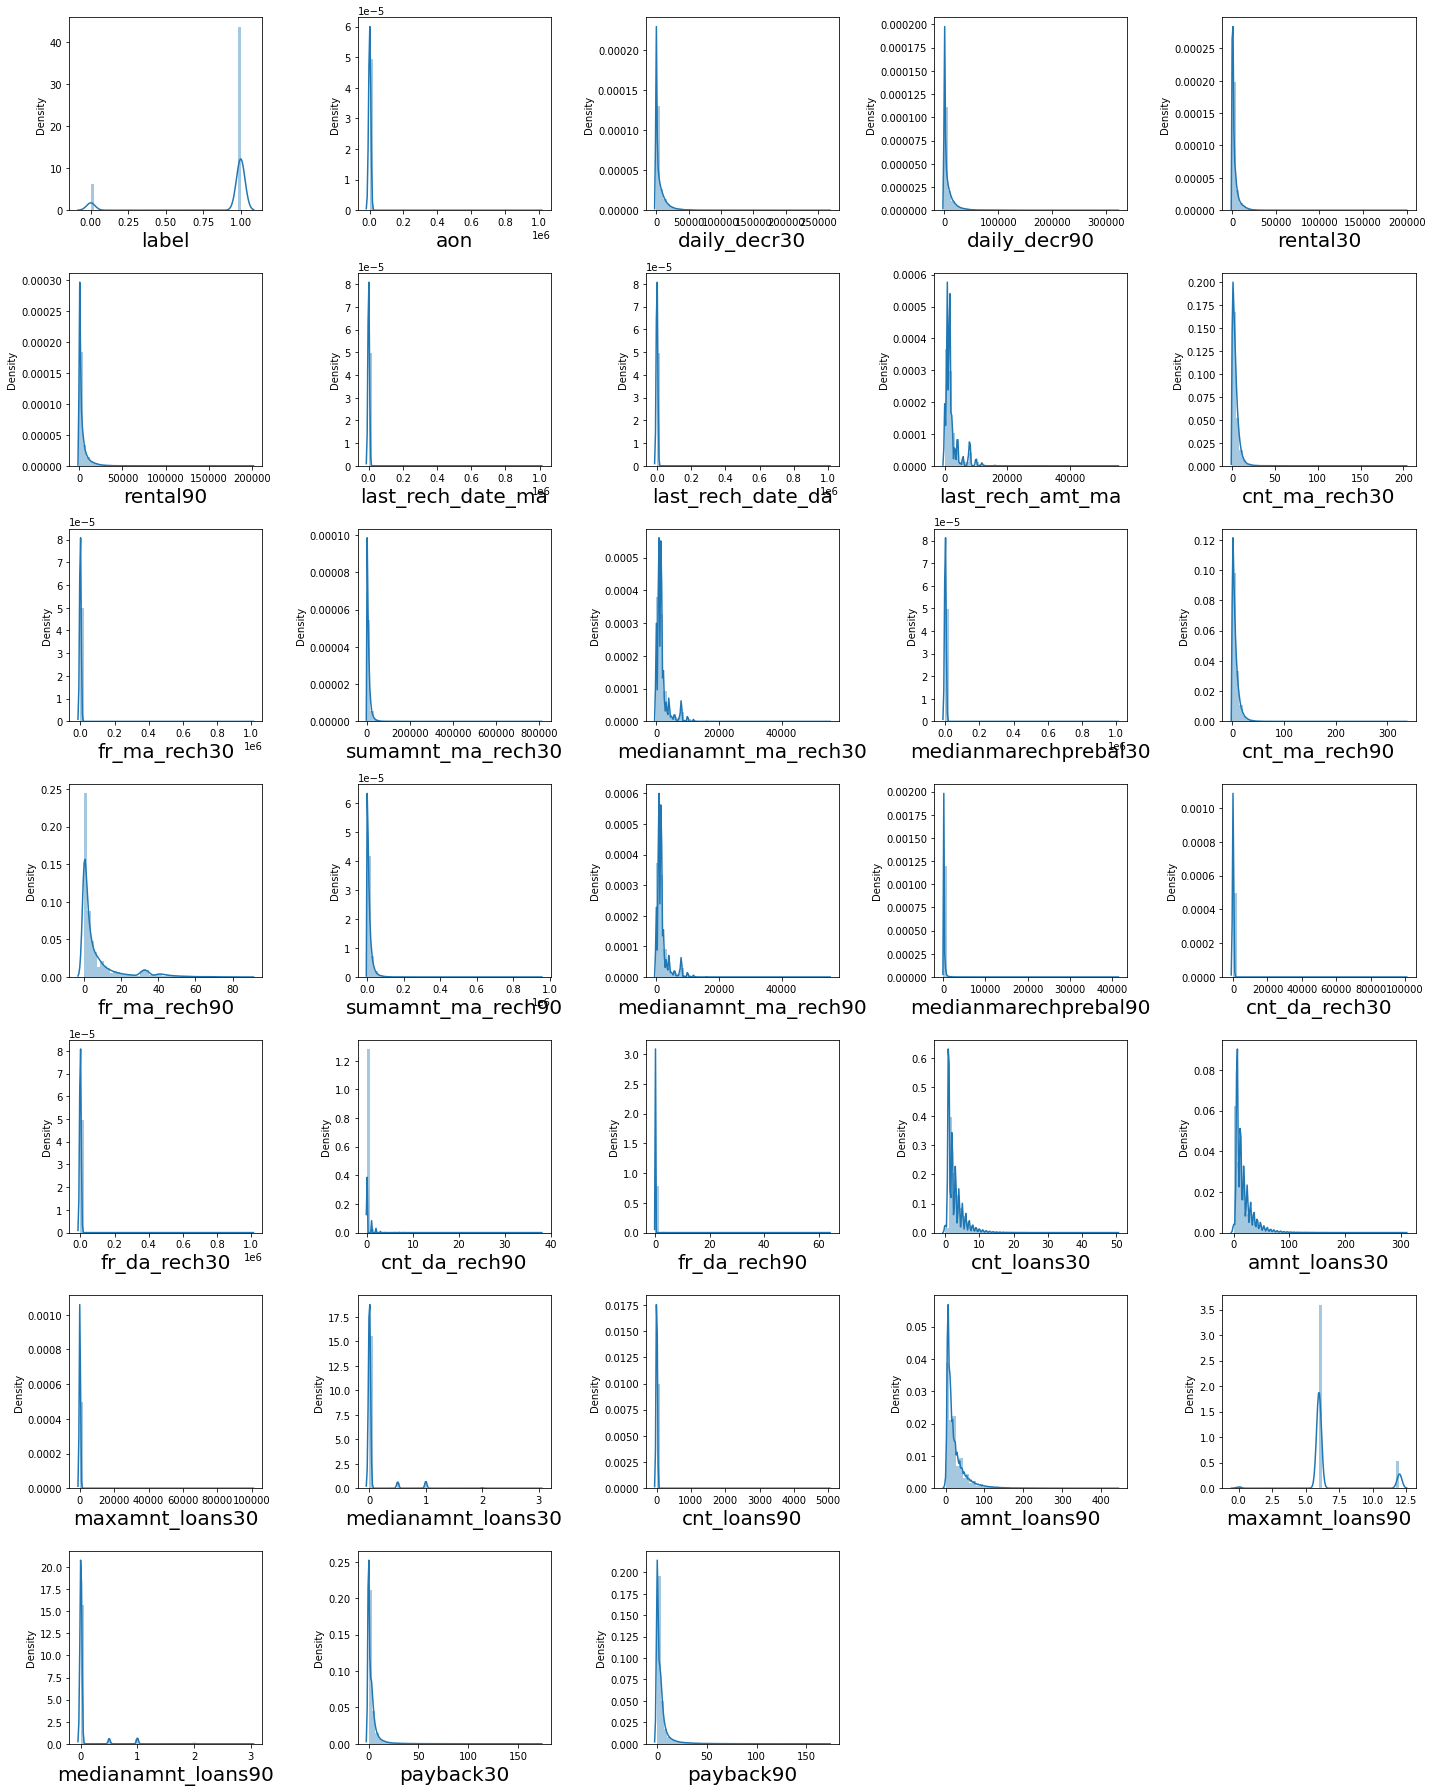

In [72]:

#Bivariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

In [21]:

df.shape


(154588, 33)

In [22]:
df['label'].value_counts()

1    133837
0     20751
Name: label, dtype: int64

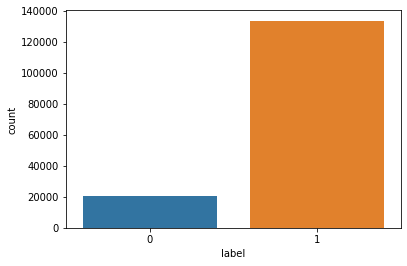

In [35]:
sns.countplot(x='label',data=df)

It shows our target class is highly imbalaced

In [23]:
df.head()

label    aon  daily_decr30  ...  medianamnt_loans90  payback30  payback90
1      1  712.0  12122.000000  ...                 0.0   0.000000   0.000000
2      1  535.0   1398.000000  ...                 0.0   0.000000   0.000000
4      1  947.0    150.619333  ...                 0.0   2.333333   2.333333
5      1  568.0   2257.362667  ...                 0.0  11.000000   8.333333
6      1  545.0   2876.641667  ...                 0.0   0.000000   0.000000

[5 rows x 33 columns]

In [24]:
x=df.drop(['label'],axis=1)
y=df.iloc[:,0:1]

Separating features and target variable




In [25]:
x.skew()

aon                     0.971588
daily_decr30            2.033526
daily_decr90            2.143508
rental30                2.321333
rental90                2.354806
last_rech_date_ma       2.292074
last_rech_date_da       0.000000
last_rech_amt_ma        2.234309
cnt_ma_rech30           1.452787
fr_ma_rech30            1.837914
sumamnt_ma_rech30       1.750240
medianamnt_ma_rech30    2.400490
medianmarechprebal30    2.571727
cnt_ma_rech90           1.550840
fr_ma_rech90            2.233987
sumamnt_ma_rech90       1.782853
medianamnt_ma_rech90    2.423562
medianmarechprebal90    2.639776
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.611928
amnt_loans30            1.571752
maxamnt_loans30         1.673249
medianamnt_loans30      0.000000
cnt_loans90             1.823254
amnt_loans90            1.805568
maxamnt_loans90         1.946367
medianamnt_loans90      0.000000
payback30 

In [26]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
         x[i]=np.square(x[i])

x.skew()    

aon                     0.114079
daily_decr30            0.445095
daily_decr90            0.499563
rental30                0.374818
rental90                0.412715
last_rech_date_ma      -0.178519
last_rech_date_da       0.000000
last_rech_amt_ma        1.267042
cnt_ma_rech30           0.592302
fr_ma_rech30            0.066957
sumamnt_ma_rech30       0.822996
medianamnt_ma_rech30    1.237948
medianmarechprebal30    0.067818
cnt_ma_rech90           0.710848
fr_ma_rech90            0.361251
sumamnt_ma_rech90      -0.395644
medianamnt_ma_rech90    1.260167
medianmarechprebal90   -0.041920
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.030985
amnt_loans30            0.040606
maxamnt_loans30         0.035315
medianamnt_loans30      0.000000
cnt_loans90             0.437955
amnt_loans90            0.436041
maxamnt_loans90         0.631251
medianamnt_loans90      0.000000
payback30 

Removing the skewness using cube root transformaton

In [27]:
x.head()

aon  daily_decr30  ...  payback30  payback90
1  8.929490     22.971610  ...   0.000000   0.000000
2  8.118041     11.181560  ...   0.000000   0.000000
4  9.820117      5.320595  ...   1.326352   1.326352
5  8.281635     13.117984  ...   2.223980   2.027401
6  8.168309     14.222041  ...   0.000000   0.000000

[5 rows x 32 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

Performing over sampling to balnce our target class

In [ ]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [ ]:
y_over=y_over.reshape(-1,1)

In [ ]:
x_over.shape

(267674, 32)

In [ ]:
y_over.shape

(267674, 1)

We can see now our target variable is perfectly balanced

In [ ]:
from sklearn.linear_model import LogisticRegression 
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)        

Best accuracy is  0.7819508611135325  on Random_state  34


Computing best random state for more accuracy

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=maxRS)

separting trainig and testing data for model evaluation

In [ ]:
x_train.shape

(187371, 32)

0.8979490180939691
[[36415  3650]
 [ 4545 35693]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     40065
           1       0.91      0.89      0.90     40238

    accuracy                           0.90     80303
   macro avg       0.90      0.90      0.90     80303
weighted avg       0.90      0.90      0.90     80303



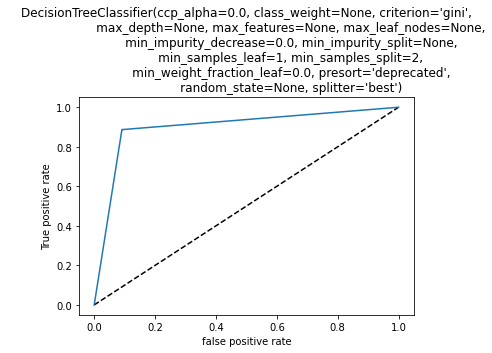

auc_score: 0.897972555308891




In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.9397531848125226
[[37517  2548]
 [ 2290 37948]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40065
           1       0.94      0.94      0.94     40238

    accuracy                           0.94     80303
   macro avg       0.94      0.94      0.94     80303
weighted avg       0.94      0.94      0.94     80303



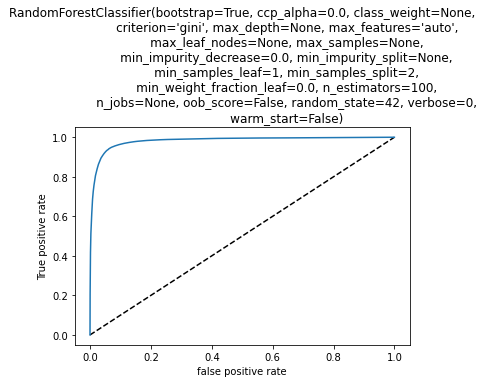

auc_score: 0.9397459836300234




In [75]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.7372949952056586
[[34132  5933]
 [15163 25075]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     40065
           1       0.81      0.62      0.70     40238

    accuracy                           0.74     80303
   macro avg       0.75      0.74      0.73     80303
weighted avg       0.75      0.74      0.73     80303



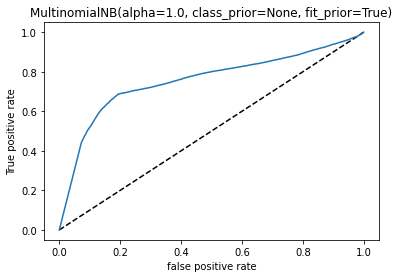

auc_score: 0.7375413962574745




In [76]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))
y_pred_prob=mnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=mnb)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(mnb)
plt.show()
auc_score=roc_auc_score(y_test,mnb.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.7819508611135325
[[32215  7850]
 [ 9660 30578]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     40065
           1       0.80      0.76      0.78     40238

    accuracy                           0.78     80303
   macro avg       0.78      0.78      0.78     80303
weighted avg       0.78      0.78      0.78     80303



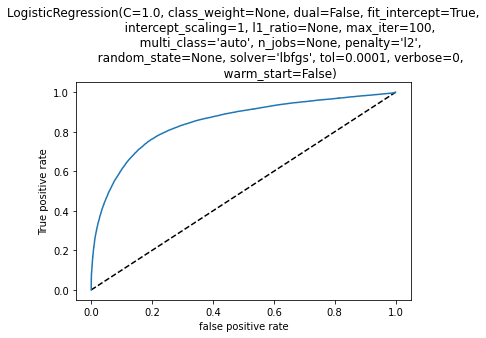

auc_score: 0.781998407367093




In [77]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [ ]:
from sklearn.model_selection import cross_val_score
mnbscores=cross_val_score(mnb,x,y,cv=5)
print(mnbscores)
print(mnbscores.mean(),mnbscores.std())

[0.66162106 0.66352934 0.65457015 0.66180419 0.66044571]
0.6603940892030202 0.0030739062524505535


In [ ]:
dtscores=cross_val_score(dtc,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.86140759 0.86030791 0.86241025 0.86150015 0.85975353]
0.8610758862389496 0.0009390362428488505


In [ ]:
lgscores=cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.86862022 0.86862022 0.86920241 0.86923052 0.87288547]
0.8697117673587422 0.0016091218715288441


In [ ]:
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.90840287 0.90665632 0.91040818 0.90966135 0.90872336]
0.9087704145462672 0.0012714357333581635


After evaluating different algorithms, we found out that Random forest Classifier have the least difference between accuracy score and cross val score.Morover, according to AUC Score, precision and recall, we comclude Random Forest is our best Model.

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': [4,5,6,7,8],
    'n_estimators': [100,500],
    'max_features':['auto','sqrt','log2']
    
}

Performing hyper paraeter tuning to get the best parameter for more accuracy

In [ ]:
grid_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}


In [56]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=500)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.86497391131091
[[35716  4349]
 [ 6494 33744]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     40065
           1       0.89      0.84      0.86     40238

    accuracy                           0.86     80303
   macro avg       0.87      0.87      0.86     80303
weighted avg       0.87      0.86      0.86     80303



In [57]:
rfcscores=cross_val_score(rfc,x,y,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.90306618 0.90180477 0.90329258 0.90176925 0.9033218 ]
0.9026509159133853 0.0007109909190399225


After evaluating the model using tuned parameter, we found that the model using Default parameter have more better performance. So, We conclude that Random Forest Classifier with default parameter setting is the best model